In [22]:
import glob
import csv
import glob
import re
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
log_files = glob.glob("C:/Users/ahmed/iCloudDrive/HAW/IE7/Elective-Project/Logging-to-csv/*.log")

In [61]:
def parse_log_file(log_file):
    with open(log_file, 'r') as file:
        content = file.read()
    
    # Extract blocks of data starting with "Timestamp"
    blocks = re.split(r'Timestamp: ', content)[1:]
    parsed_data = []

    # Extract PlayerID from Unique ID line
    unique_id = None
    for line in content.splitlines():
        if line.startswith("Unique ID:"):
            unique_id = line.split("Unique ID: ")[1].strip()
            break

    if not unique_id:
        raise ValueError("Unique ID not found in log file.")

    for block in blocks:
        lines = block.strip().split('\n')
        timestamp = lines[0].strip()
        data_dict = {"Timestamp": timestamp, "PlayerID": unique_id}  # Assigning PlayerID

        # Initialize card counts
        card_counts = {
            "Draw 2": 0,
            "Recycling Station": 0,
            "House": 0,
            "Eco-House": 0,
            "Factory": 0,
            "Buy Tile": 0,
            "Decoration": 0
        }

        for line in lines[1:]:
            if ":" in line:
                key, value = line.split(":", 1)
                key = key.strip()
                value = value.strip()

                if key == "Gold":
                    data_dict["Gold"] = int(value)
                #elif key == "Building":
                #    data_dict["Building"] = int(value)
                elif key == "Population":
                    data_dict["Population"] = int(value)
                elif key == "Happiness":
                    data_dict["Happiness"] = float(value)
                elif key == "Pollution":
                    data_dict["Pollution"] = float(value)
                elif key == "Inventory":
                    # Count inventory items
                    if value in card_counts:
                        card_counts[value] += 1
                elif key == "Card Played":
                    # Track which card was played
                    data_dict["Action"] = value
                elif key == "Cards Drawn":
                    # Mark if "Draw 2" card was drawn
                    if "Draw 2" in card_counts:
                    #    data_dict["isCardDrawn"] = card_counts["Draw 2"] > 0
                    #if "Draw 2" == "true":
                        data_dict["isCardDrawn"] = True
                elif key == "Cards Discarded":
                    # Mark if any card was discarded
                    data_dict["isCardDiscarded"] = True
        
        # Include card counts in data dictionary
        data_dict.update(card_counts)
        
        # Ensure all columns are present with default values
        for card_type in ["Draw 2", "Recycling Station", "House", "Eco-House", "Factory", "Buy Tile", "Decoration"]:
            if card_type not in data_dict:
                data_dict[card_type] = 0
        
        # Mark isCardDrawn as False if not set
        if "isCardDrawn" not in data_dict:
            data_dict["isCardDrawn"] = False
        
        # Mark isCardDiscarded as False if not set
        if "isCardDiscarded" not in data_dict:
            data_dict["isCardDiscarded"] = False
        
        parsed_data.append(data_dict)

    return parsed_data

def write_to_csv(data, output_file):
    # Define CSV header based on the specified columns
    csv_header = ["PlayerID", "Timestamp", "Gold", "Population", "Happiness", 
                  "Pollution", "Action", "Draw 2", "Recycling Station", "House", "Eco-House", 
                  "Factory", "Decoration", "Buy Tile", "isCardDrawn", "isCardDiscarded"]

    # Write data to CSV file
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_header)
        writer.writeheader()
        for entry in data:
            writer.writerow(entry)

def process_logs(input_directory, output_file):
    log_files = glob.glob(f"{input_directory}/*.log")
    all_data = []

    for log_file in log_files:
        try:
            parsed_data = parse_log_file(log_file)
            all_data.extend(parsed_data)
        except ValueError as e:
            print(f"Skipping {log_file}: {str(e)}")
            continue

    write_to_csv(all_data, output_file)

In [62]:
process_logs("C:/Users/ahmed/iCloudDrive/HAW/IE7/Elective-Project/Logging-to-csv/", "logs.csv")

Skipping C:/Users/ahmed/iCloudDrive/HAW/IE7/Elective-Project/Logging-to-csv\godot2024-06-26T16.16.27.log: Unique ID not found in log file.
Skipping C:/Users/ahmed/iCloudDrive/HAW/IE7/Elective-Project/Logging-to-csv\godot2024-06-27T16.42.45.log: Unique ID not found in log file.


In [63]:
logs = pd.read_csv("logs.csv")

In [64]:
logs = logs.drop_duplicates()

In [10]:
playerID_1532542490_1898953274 = duckdb.query("select * from aggregated_logs where PlayerID = '1532542490_1898953274'").df()

In [11]:
playerID_1532542490_1898953274.head(50)

,PlayerID,Timestamp,Gold,Population,Happiness,Pollution,Action,Draw 2,Recycling Station,House,Eco-House,Factory,Decoration,Buy Tile,isCardDiscarded
0,1532542490_1898953274,2024-07-02 12:00:00,500,0,50.0,10.0,None,0,0,1,0,0,1,1,False
1,1532542490_1898953274,2024-07-02 12:03:00,490,5,50.0,10.0,House,0,0,0,0,0,1,1,False
2,1532542490_1898953274,2024-07-02 12:10:00,500,5,52.0,10.5,None,0,0,0,0,0,0,1,False
3,1532542490_1898953274,2024-07-02 12:20:00,510,5,54.0,11.0,None,0,0,0,0,0,1,1,False
4,1532542490_1898953274,2024-07-02 12:26:00,435,5,54.0,11.0,Decoration,0,0,0,0,0,0,1,False
5,1532542490_1898953274,2024-07-02 12:30:00,445,5,56.0,11.5,None,0,0,0,0,0,0,1,False
6,1532542490_1898953274,2024-07-02 12:36:00,245,5,56.0,11.5,Buy Tile,0,1,1,1,0,0,0,False
7,1532542490_1898953274,2024-07-02 12:40:00,255,5,58.0,12.0,None,0,1,1,1,0,0,0,False
8,1532542490_1898953274,2024-07-02 12:45:00,245,10,58.0,12.0,House,0,1,0,1,0,0,0,False
9,1532542490_1898953274,2024-07-02 12:50:00,265,10,60.0,13.0,None,0,1,0,1,0,0,0,False


In [65]:
# Convert 'Timestamp' column to datetime format
logs['Timestamp'] = pd.to_datetime(logs['Timestamp'])

# Sort by Timestamp within each PlayerID
logs_sorted = logs.sort_values(by=['PlayerID', 'Timestamp'])

# Group by PlayerID and keep last non-null values for each column
aggregated_logs = logs_sorted.groupby(['PlayerID', 'Timestamp']).last().reset_index()

# Drop column 'isCardDrawn' # NOT NEEDED
aggregated_logs = aggregated_logs.drop('isCardDrawn', axis=1)

print("\nAggregated DataFrame:")
aggregated_logs.shape[0]

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\3185037524.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  logs['Timestamp'] = pd.to_datetime(logs['Timestamp'])



Aggregated DataFrame:


4502

In [25]:
aggregated_logs.to_csv("C:/Users/ahmed/iCloudDrive/HAW/IE7/Elective-Project/Logging-to-csv/aggregated_logs.csv")

-------------------------------------------------------------------------------

--------------------------------

-------------------------

# WHAT IS THE MOST USED CARD

In [184]:
duckdb.query("""
            SELECT 
                CASE WHEN Action = 'Draw 2' THEN COUNT(Action) ELSE NULL                    END AS Draw2,
                CASE WHEN Action = 'House' THEN COUNT(Action) ELSE NULL                     END AS House,
                CASE WHEN Action = 'Eco-House' THEN COUNT(Action) ELSE NULL                 END AS EcoHouse,
                CASE WHEN Action = 'Recycling Station' THEN COUNT(Action) ELSE NULL         END AS RecyclingStation,
                CASE WHEN Action = 'Factory' THEN COUNT(Action) ELSE NULL                   END AS Factory,
                CASE WHEN Action = 'Buy Tile' THEN COUNT(Action) ELSE NULL                  END AS BuyTile,
                CASE WHEN Action = 'Decoration' THEN COUNT(Action) ELSE NULL                END AS Decoration
            FROM aggregated_logs  
            GROUP BY Action 
            """)

┌───────┬───────┬──────────┬──────────────────┬─────────┬─────────┬────────────┐
│ Draw2 │ House │ EcoHouse │ RecyclingStation │ Factory │ BuyTile │ Decoration │
│ int64 │ int64 │  int64   │      int64       │  int64  │  int64  │   int64    │
├───────┼───────┼──────────┼──────────────────┼─────────┼─────────┼────────────┤
│  NULL │  NULL │     NULL │             NULL │    NULL │    NULL │         92 │
│  NULL │  NULL │     NULL │             NULL │      77 │    NULL │       NULL │
│  NULL │  NULL │     NULL │              221 │    NULL │    NULL │       NULL │
│   204 │  NULL │     NULL │             NULL │    NULL │    NULL │       NULL │
│  NULL │  NULL │     NULL │             NULL │    NULL │    NULL │       NULL │
│  NULL │   214 │     NULL │             NULL │    NULL │    NULL │       NULL │
│  NULL │  NULL │      155 │             NULL │    NULL │    NULL │       NULL │
│  NULL │  NULL │     NULL │             NULL │    NULL │     335 │       NULL │
└───────┴───────┴──────────┴

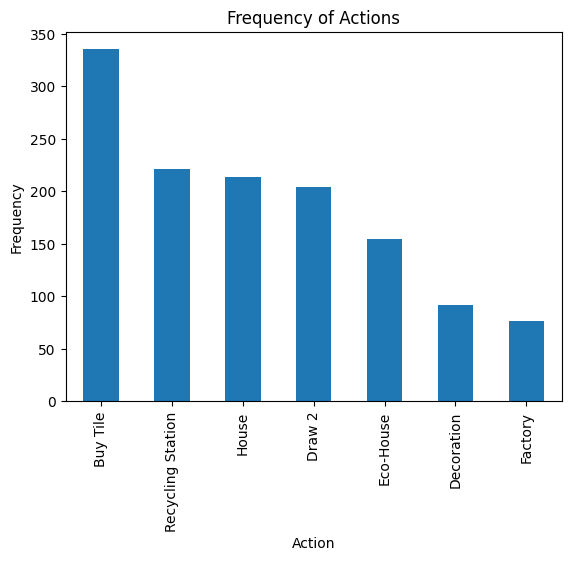

In [192]:
# Frequency of actions
action_counts = aggregated_logs['Action'].value_counts()
action_counts.plot(kind='bar', title='Frequency of Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.show()

# THE MOST USED IS: BUY TILE ----- THE LEAST USED IS: FACTORY

-------------------



# However, the Factory card is the most impactful card when it comes to Gold, followed by Decoration. 
# Both are the least used cards!

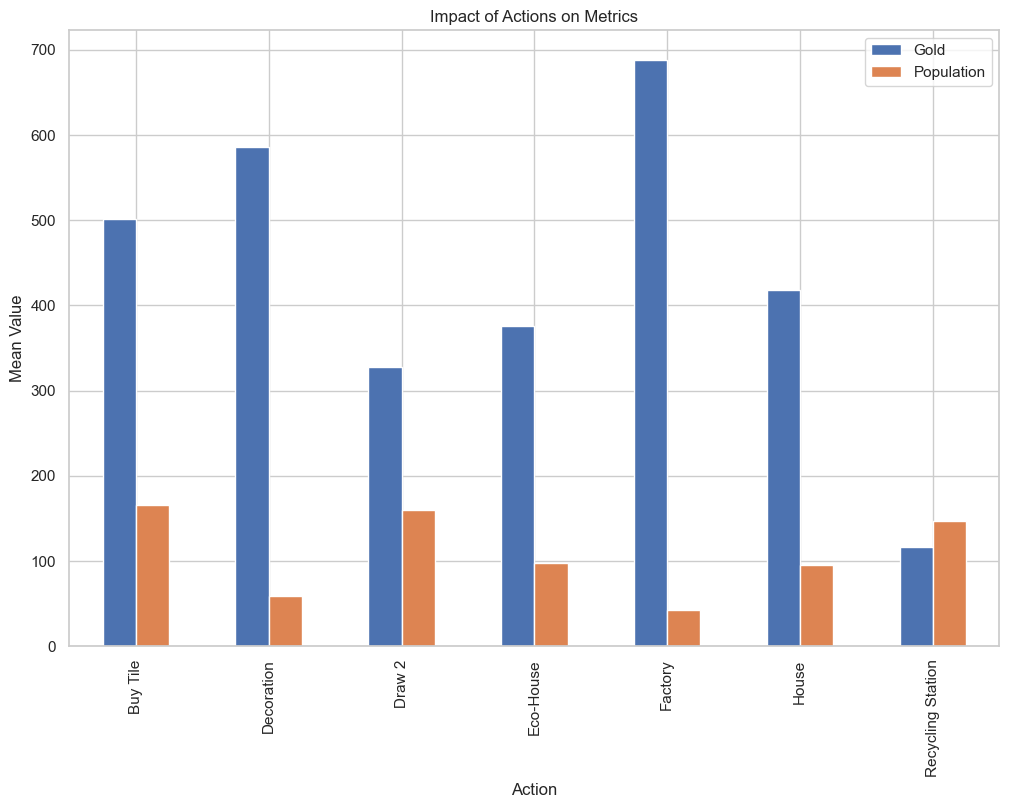

In [96]:
# Group by Action and calculate mean values for metrics
impact_of_actions = aggregated_logs.groupby('Action')[['Gold', 'Population']].mean()

# Plot the impact of actions on each metric
impact_of_actions[['Gold', 'Population']].plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Actions on Metrics')
plt.xlabel('Action')
plt.ylabel('Mean Value')
plt.show()


# Interestingly, the Factory card doesn't have the most Pollution impact on the game! 

------------------------------------------------------------------------------

# Player Behaviour Analysis:
#### We'll look at specific timestamps where significant changes occur and analyze actions around these events.


##### First I identified a threshold to Gold, Happiness, and Pollution, so that when it's exceeded I look at what caused that significant change

                   Gold_Change  Population_Change
Action                                           
Buy Tile           -169.021583          -5.143885
Decoration        -2983.700000         -43.500000
Draw 2             -127.569231           4.430769
Eco-House          -471.875000         -12.600000
Factory           -1493.000000         -57.833333
House              -596.775510         -59.326531
Recycling Station  -172.059701         -22.014925


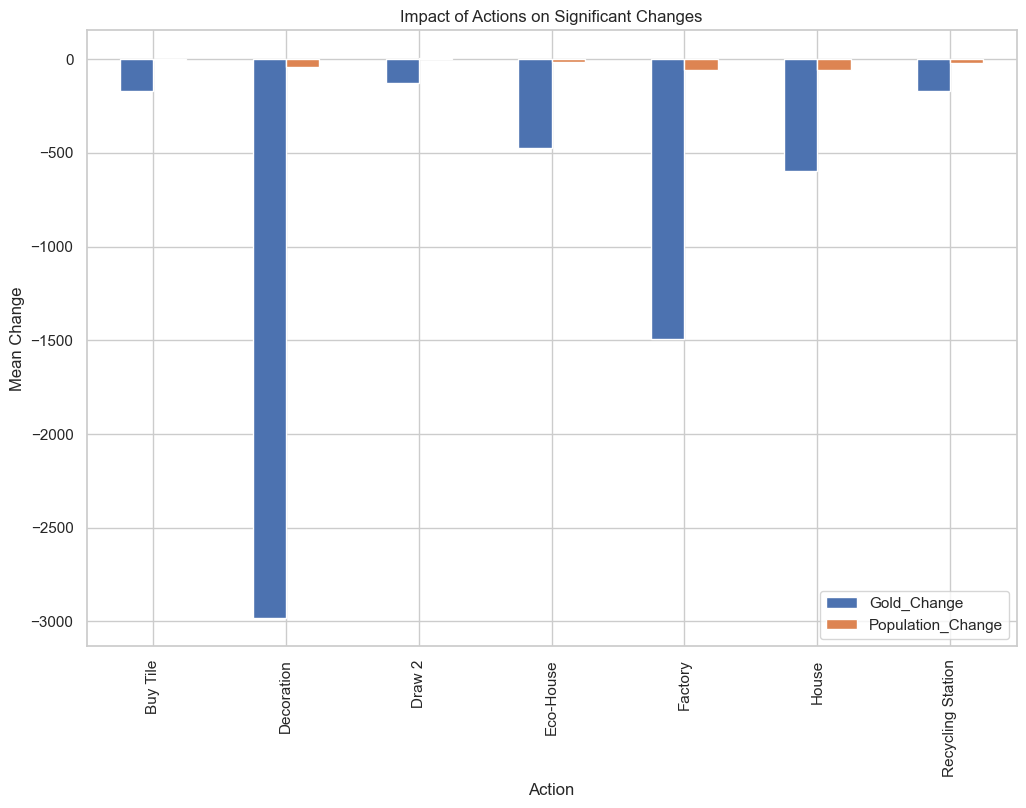

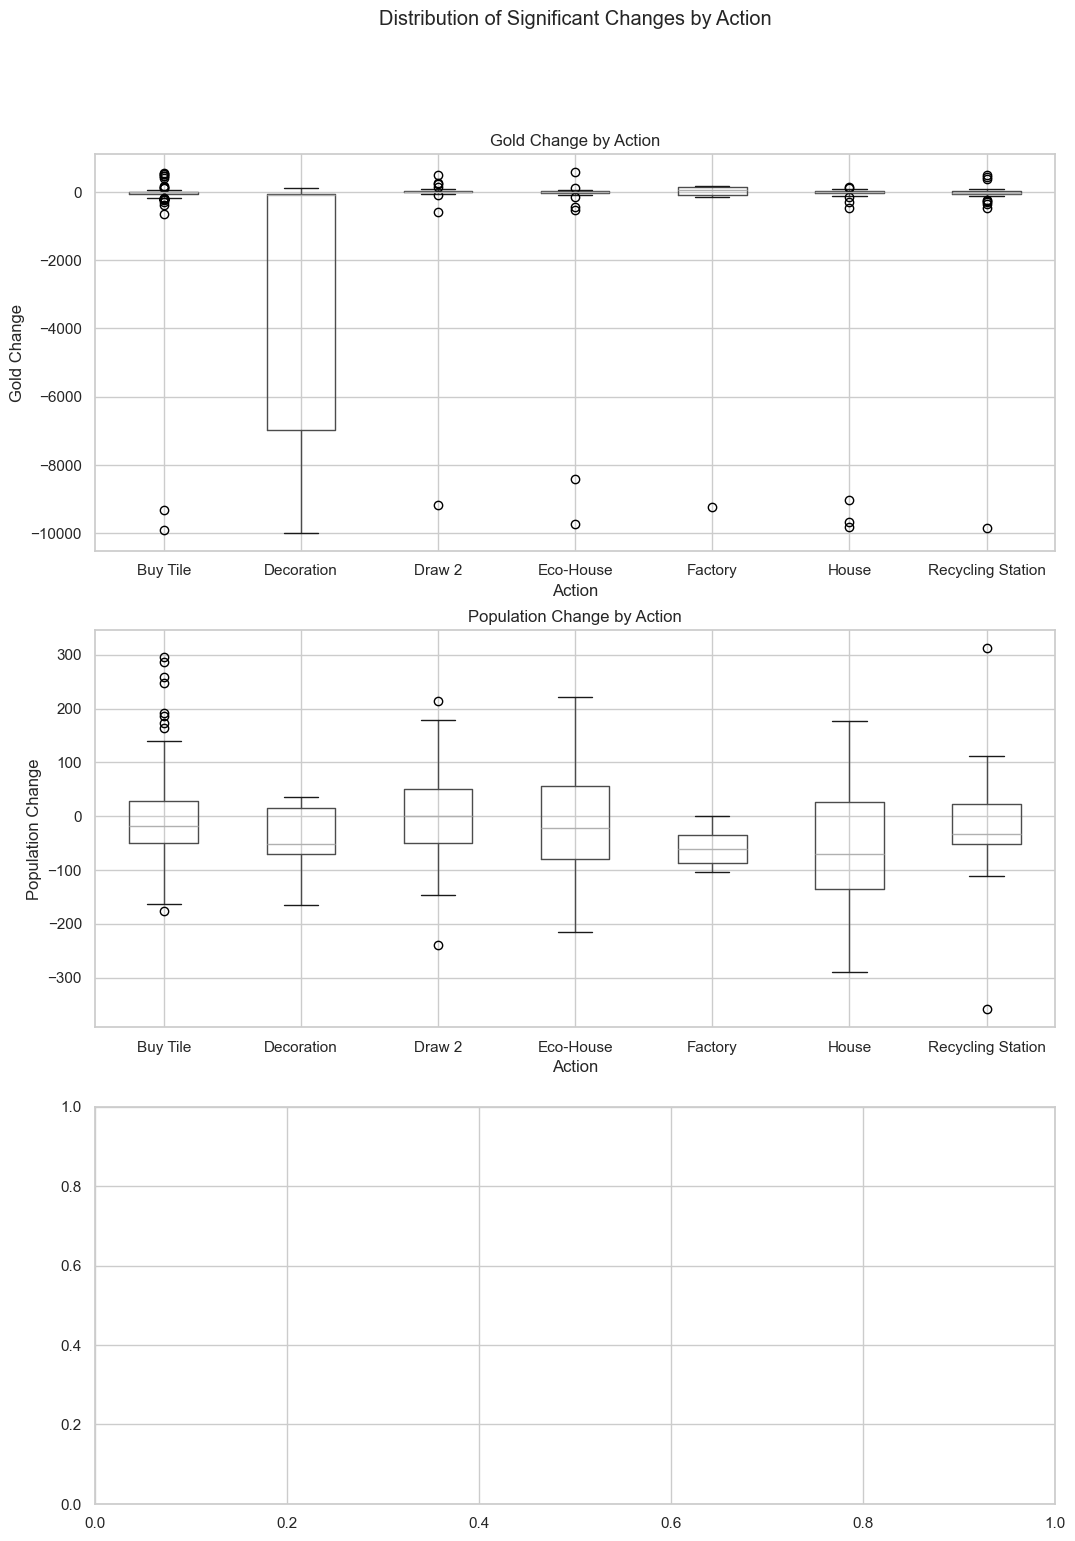

In [100]:
# Calculate differences between consecutive rows
aggregated_logs['Gold_Change'] = aggregated_logs['Gold'].diff()
aggregated_logs['Happiness_Change'] = aggregated_logs['Happiness'].diff()
aggregated_logs['Pollution_Change'] = aggregated_logs['Pollution'].diff()
aggregated_logs['Population_Change'] = aggregated_logs['Population'].diff()

# Define significant change as an absolute change greater than a threshold
threshold_gold = 100
threshold_happiness = 20
threshold_pollution = 20
threshold_population = 20

# Identify significant changes
significant_changes = aggregated_logs[(aggregated_logs['Gold_Change'].abs() > threshold_gold) |
                           (aggregated_logs['Happiness_Change'].abs() > threshold_happiness) |
                           (aggregated_logs['Pollution_Change'].abs() > threshold_pollution) |
                           (aggregated_logs['Population_Change'].abs() > threshold_population)]

significant_changes.head() # let's see what triggered these signifacnt changes

# Group by Action and calculate mean changes
action_impact = significant_changes.groupby('Action')[['Gold_Change', 'Population_Change']].mean()

# Display the grouped data to verify
print(action_impact)

# Plot the impact of actions on significant changes
action_impact.plot(kind='bar', figsize=(12, 8))
plt.title('Impact of Actions on Significant Changes')
plt.xlabel('Action')
plt.ylabel('Mean Change')
plt.show()

# Visualize the distribution of significant changes for each action
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

significant_changes.boxplot(column='Gold_Change', by='Action', ax=ax[0])
ax[0].set_title('Gold Change by Action')
ax[0].set_xlabel('Action')
ax[0].set_ylabel('Gold Change')

#significant_changes.boxplot(column='Happiness_Change', by='Action', ax=ax[1])
#ax[1].set_title('Happiness Change by Action')
#ax[1].set_xlabel('Action')
#ax[1].set_ylabel('Happiness Change')

#significant_changes.boxplot(column='Pollution_Change', by='Action', ax=ax[2])
#ax[2].set_title('Pollution Change by Action')
#ax[2].set_xlabel('Action')
#ax[2].set_ylabel('Pollution Change')

significant_changes.boxplot(column='Population_Change', by='Action', ax=ax[1])
ax[1].set_title('Population Change by Action')
ax[1].set_xlabel('Action')
ax[1].set_ylabel('Population Change')

plt.suptitle('Distribution of Significant Changes by Action')
plt.show()

# The green bar in the Box Plot indicates the mean value. and the black bar at both top and bottom are the outliers, Box Plots sometimes are annoying to read if you see them for the first time :) 

---------------------

# Factory and Decoration are way too overpowered when it comes to Gold, despite being the least used cards

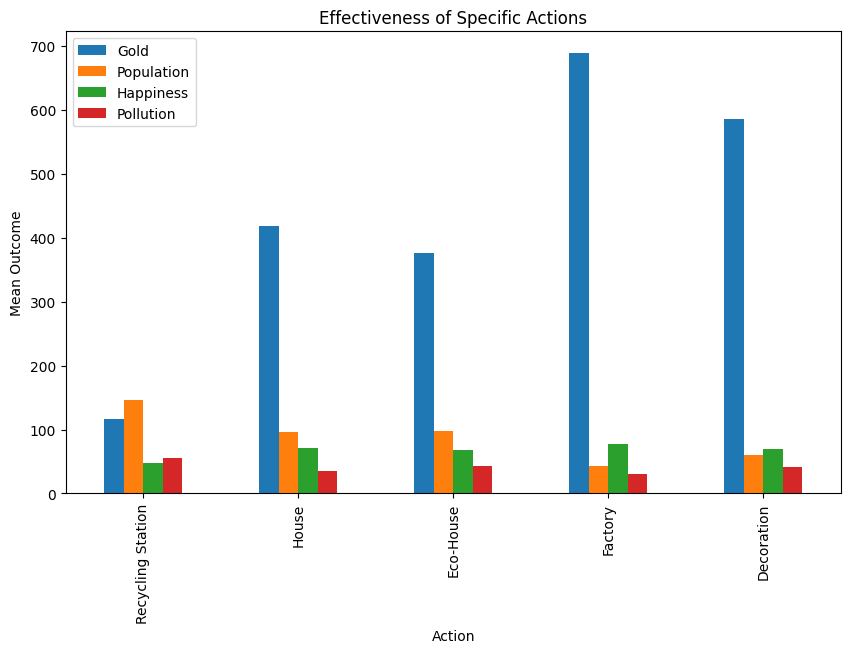

In [12]:
# Group by Action and calculate mean outcomes
strategy_effectiveness = aggregated_logs.groupby('Action')[['Gold', 'Population', 'Happiness', 'Pollution']].mean()


# Compare outcomes for specific actions
selected_actions = strategy_effectiveness.loc[['Recycling Station', 'House', 'Eco-House', 'Factory', 'Decoration']]
selected_actions.plot(kind='bar', figsize=(10, 6))
plt.title('Effectiveness of Specific Actions')
plt.xlabel('Action')
plt.ylabel('Mean Outcome')
plt.show()


----------------------------------

# How often were the cards discarded by the Player? and what did the inventory look like when they did so!

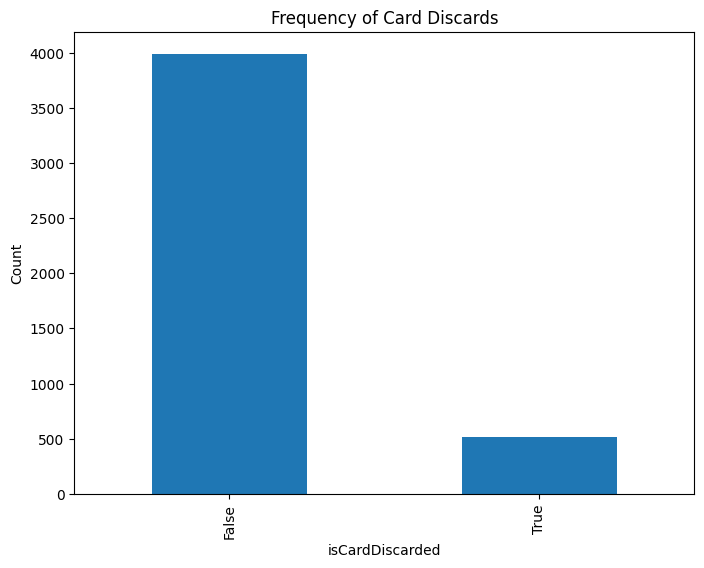

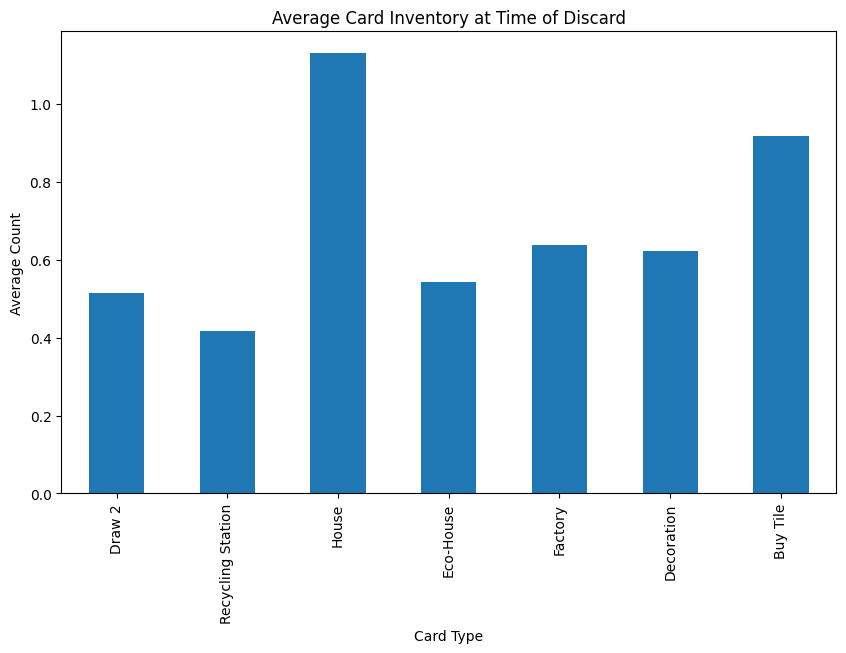

In [209]:
# Frequency of card discards
discarded_counts = aggregated_logs['isCardDiscarded'].value_counts()

# Filter data for rows where cards were discarded
discarded_data = aggregated_logs[aggregated_logs['isCardDiscarded'] == True]

# Plot the frequency of card discards
discarded_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Frequency of Card Discards')
plt.xlabel('isCardDiscarded')
plt.ylabel('Count')
plt.show()

# Calculate and plot the mean values of card inventory at the time of discard
mean_inventory_at_discard = discarded_data[['Draw 2', 'Recycling Station', 'House', 'Eco-House', 'Factory', 'Decoration', 'Buy Tile']].mean()

mean_inventory_at_discard.plot(kind='bar', figsize=(10, 6))
plt.title('Average Card Inventory at Time of Discard')
plt.xlabel('Card Type')
plt.ylabel('Average Count')
plt.show()


---------------------------

In [164]:
# Calculate statistics
statistics = aggregated_logs[['Gold', 'Happiness', 'Pollution', 'Population']].describe().loc[['mean', '50%', 'std']]
statistics.rename(index={'50%': 'median'}, inplace=True)
print(statistics)


               Gold  Happiness  Pollution  Population
mean     631.333629  66.492137  41.320657   92.958241
median    81.000000  74.800000  37.100000   55.000000
std     2025.902846  34.692399  32.357844  105.612741


# The above statistical analysis proves that Gold metric needs calibration. The std deviates a lot from the mean value of Gold

-------------------------------------------------------------------------------------------------------------

In [14]:
metrics = ['Happiness', 'Pollution', 'Population']

# Analyzing correlation between Population and Pollution

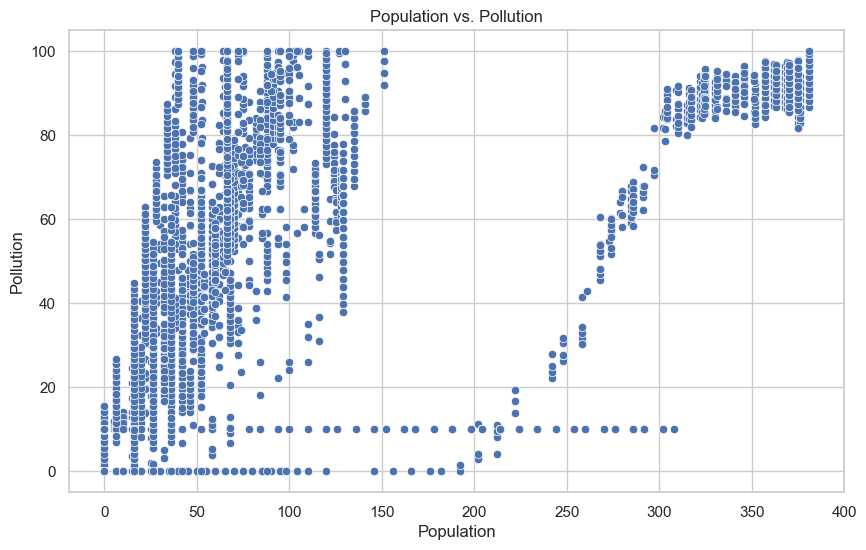

<Figure size 640x480 with 0 Axes>

In [30]:

# Calculating the correlation coefficient between population and pollution
population_pollution_corr = aggregated_logs[['Population', 'Pollution']].corr()


population_pollution_corr


# Set up the visualization environment
sns.set_theme(style="whitegrid")

# Create a scatter plot for Population vs. Pollution to visualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Pollution', data=aggregated_logs)
plt.title('Population vs. Pollution')
plt.xlabel('Population')
plt.ylabel('Pollution')
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()


# From the above graph we see positive correlation of the Pollutoin as the Population increase. The Gap in the middle caused by one of the game sessions where the player seemed Idle for quite sometime

---------------------------------

# Impact of Factory over game metrics

Impact of 'Factory' actions on metrics:
Gold         688.298701
Happiness     77.809091
Pollution     29.763636
dtype: float64


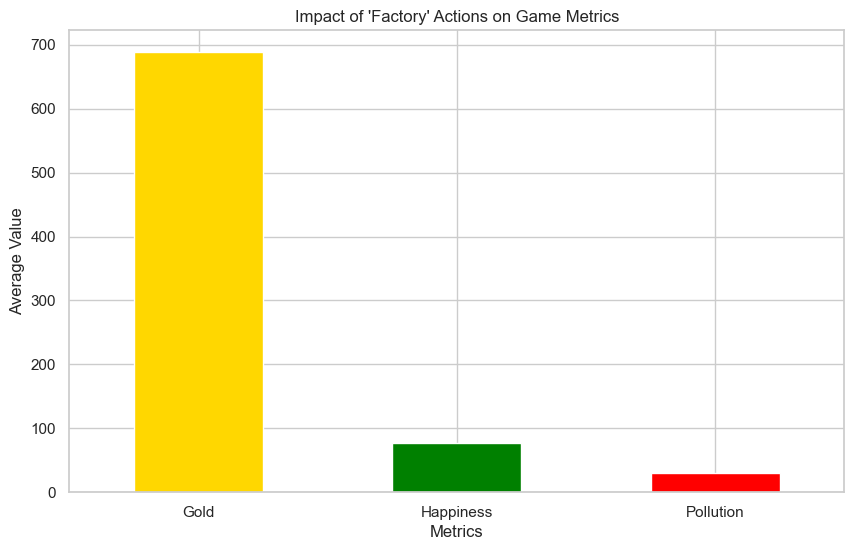

In [94]:
# Filter the dataset for 'House' actions
house_data = aggregated_logs[aggregated_logs['Action'] == 'Factory']

# Calculate the mean values for Gold, Happiness, and Pollution
house_impact = house_data[['Gold', 'Happiness', 'Pollution']].mean()

# Print the mean values
print("Impact of 'Factory' actions on metrics:")
print(house_impact)

# Visualize the data
plt.figure(figsize=(10, 6))
house_impact.plot(kind='bar', color=['gold', 'green', 'red'])
plt.title("Impact of 'Factory' Actions on Game Metrics")
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.show()

# GOLD INCREASES REALLY RAPIDLY AND THE PLAYER HAS THE OPTION TO DO WHATEVER THEY WANT (NO SOCIAL DILEMMA)

C:\Users\ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


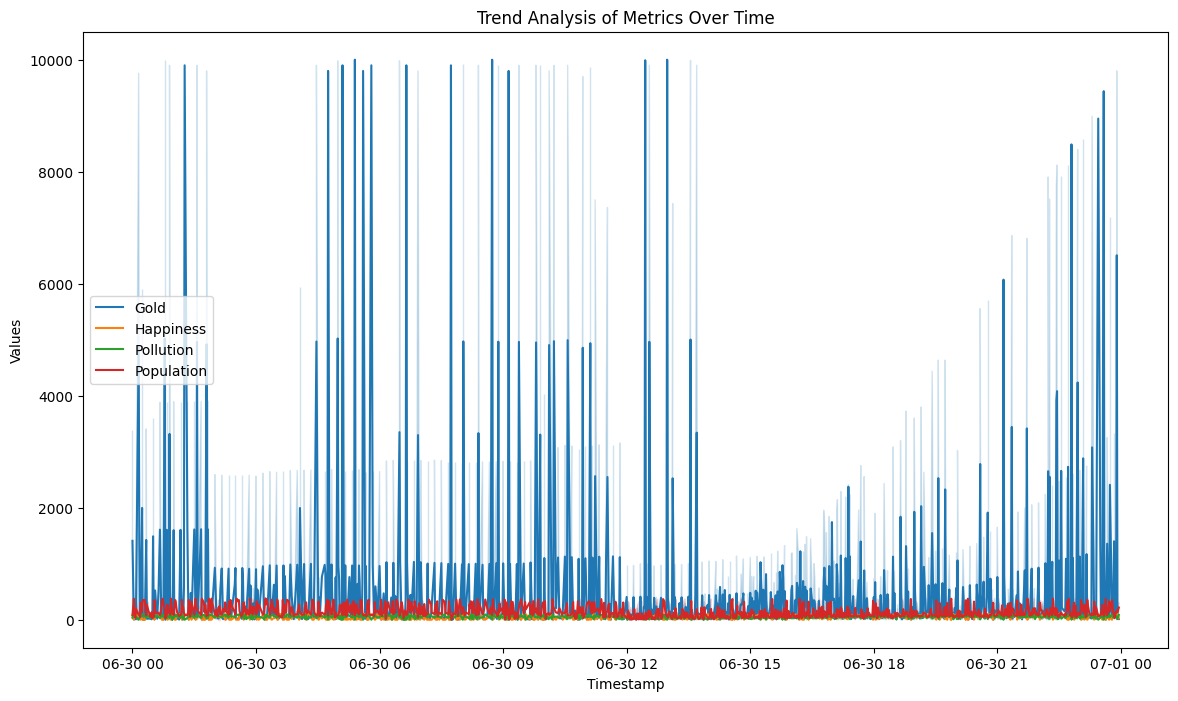

In [150]:
# Plot time series
metrics = ['Gold', 'Happiness', 'Pollution', 'Population']
plt.figure(figsize=(14, 8))
for metric in metrics:
    sns.lineplot(x='Timestamp', y=metric, data=aggregated_logs, label=metric)

plt.title('Trend Analysis of Metrics Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()


-------------------------

# Let's break that behaviour down into 4 graphs and look for a specific PlayerID 

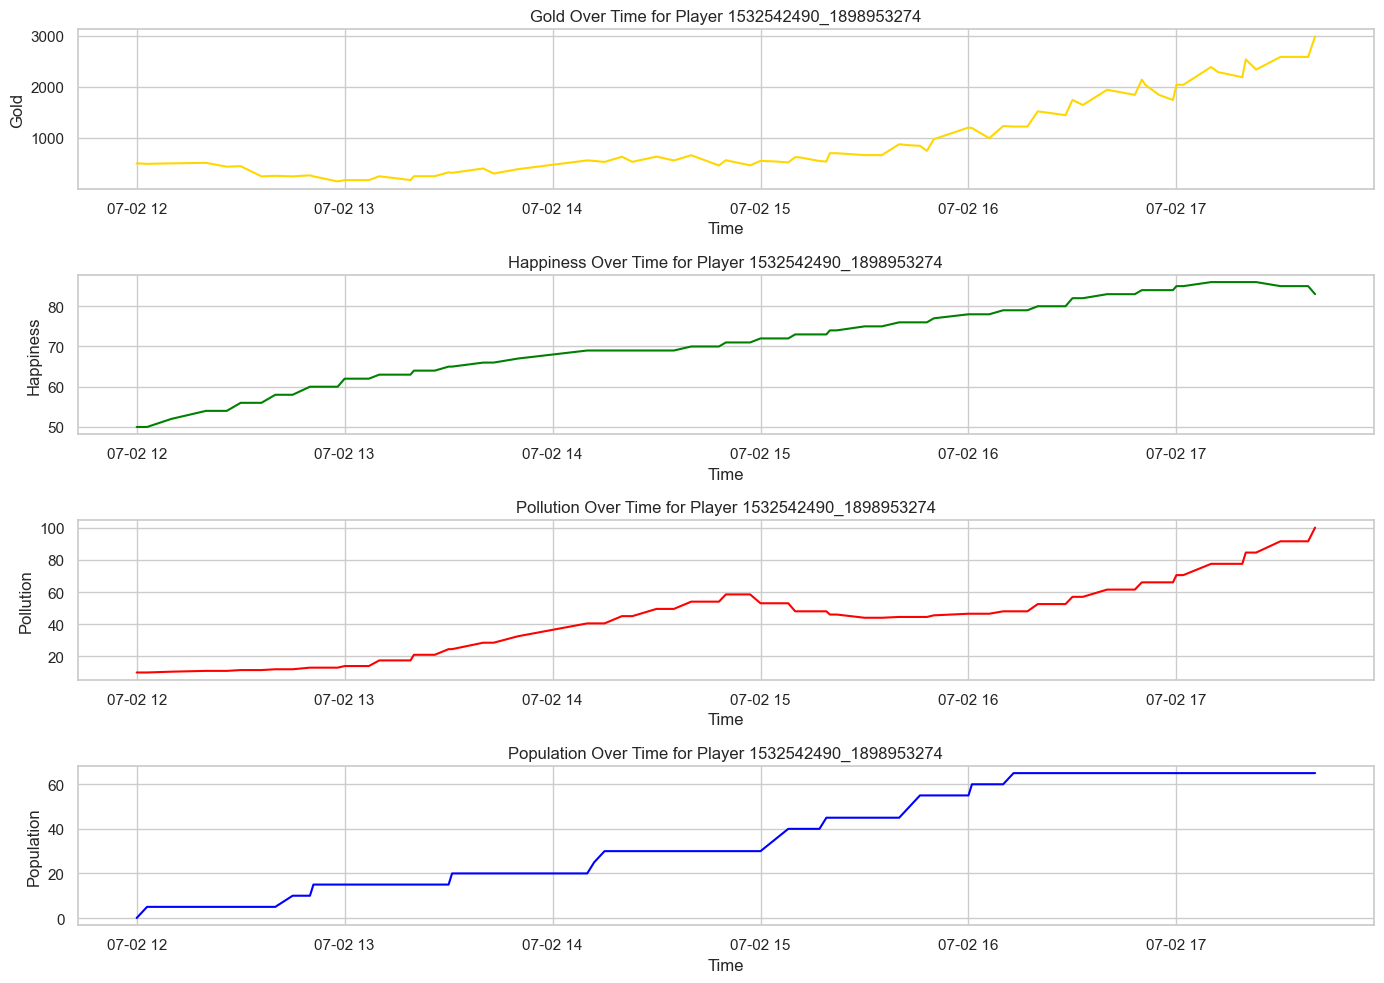

Action Sequence for Player 1532542490_1898953274: ['House', 'Decoration', 'Buy Tile', 'House', 'Eco-House', 'Factory', 'Decoration', 'Draw 2', 'House', 'House', 'Eco-House', 'Decoration', 'Buy Tile', 'Recycling Station', 'House', 'Eco-House', 'Factory', 'Decoration', 'House', 'Draw 2', 'Buy Tile', 'Factory', 'Eco-House', 'House', 'House', 'Buy Tile', 'Draw 2', 'House', 'Factory', 'Decoration', 'Buy Tile', 'Factory', 'Buy Tile', 'Factory']


In [90]:
# Identify player sessions by grouping by PlayerID
players = aggregated_logs['PlayerID'].unique()

# Function to plot metrics over time for a given player
def plot_player_metrics(player_data, player_id):
    plt.figure(figsize=(14, 10))

    # Plot Gold over time
    plt.subplot(4, 1, 1)
    plt.plot(player_data['Timestamp'], player_data['Gold'], label='Gold', color='gold')
    plt.title(f'Gold Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Gold')

    # Plot Happiness over time
    plt.subplot(4, 1, 2)
    plt.plot(player_data['Timestamp'], player_data['Happiness'], label='Happiness', color='green')
    plt.title(f'Happiness Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Happiness')

    # Plot Pollution over time
    plt.subplot(4, 1, 3)
    plt.plot(player_data['Timestamp'], player_data['Pollution'], label='Pollution', color='red')
    plt.title(f'Pollution Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Pollution')

    # Plot Population over time
    plt.subplot(4, 1, 4)
    plt.plot(player_data['Timestamp'], player_data['Population'], label='Population', color='blue')
    plt.title(f'Population Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.tight_layout()
    plt.show()

# Analyze a sample player
sample_player_id = players[4]  # Replace with any specific PlayerID if needed
sample_player_data = aggregated_logs[aggregated_logs['PlayerID'] == sample_player_id]

# Plot metrics for the sample player
plot_player_metrics(sample_player_data, sample_player_id)

# Function to analyze action sequences for a given player
def analyze_action_sequences(player_data):
    action_sequence = player_data['Action'].dropna().tolist()
    return action_sequence

# Analyze action sequences for the sample player
action_sequence = analyze_action_sequences(sample_player_data)
print(f'Action Sequence for Player {sample_player_id}: {action_sequence}')


# As the game progresses the Gold metric approaches 3000. Happiness to 80%, but surprisingly the Pollution is also 100%. So diffently some calibration here needed between Pollution and Happiness (you can't have a city that's 100% Polluted and at the same time 80% Happy!)

--------------------

# Now let's observe how did that player use their cards to understand their startegy

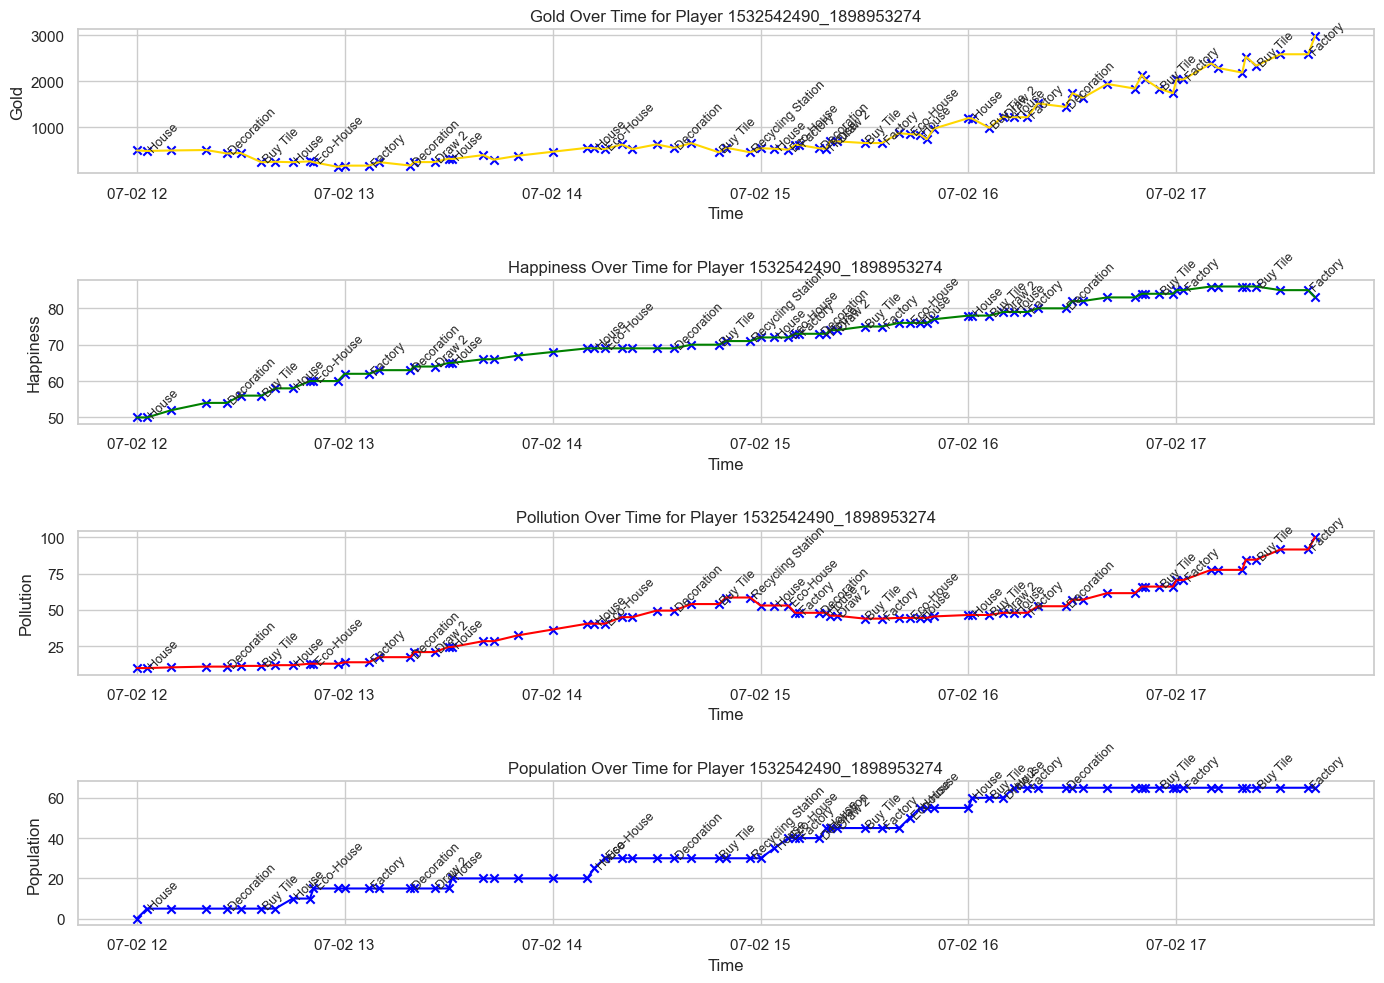

In [91]:
# Function to plot metrics over time for a given player, with actions marked
def plot_player_actions_and_metrics(player_data, player_id):
    plt.figure(figsize=(14, 10))

    # Plot Gold over time
    plt.subplot(4, 1, 1)
    plt.plot(player_data['Timestamp'], player_data['Gold'], label='Gold', color='gold')
    plt.scatter(player_data['Timestamp'], player_data['Gold'], c='blue', marker='x')
    for i in range(len(player_data)):
        plt.text(player_data['Timestamp'].iloc[i], player_data['Gold'].iloc[i], player_data['Action'].iloc[i], fontsize=9, rotation=45)
    plt.title(f'Gold Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Gold')

    # Plot Happiness over time
    plt.subplot(4, 1, 2)
    plt.plot(player_data['Timestamp'], player_data['Happiness'], label='Happiness', color='green')
    plt.scatter(player_data['Timestamp'], player_data['Happiness'], c='blue', marker='x')
    for i in range(len(player_data)):
        plt.text(player_data['Timestamp'].iloc[i], player_data['Happiness'].iloc[i], player_data['Action'].iloc[i], fontsize=9, rotation=45)
    plt.title(f'Happiness Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Happiness')

    # Plot Pollution over time
    plt.subplot(4, 1, 3)
    plt.plot(player_data['Timestamp'], player_data['Pollution'], label='Pollution', color='red')
    plt.scatter(player_data['Timestamp'], player_data['Pollution'], c='blue', marker='x')
    for i in range(len(player_data)):
        plt.text(player_data['Timestamp'].iloc[i], player_data['Pollution'].iloc[i], player_data['Action'].iloc[i], fontsize=9, rotation=45)
    plt.title(f'Pollution Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Pollution')

    # Plot Population over time
    plt.subplot(4, 1, 4)
    plt.plot(player_data['Timestamp'], player_data['Population'], label='Population', color='blue')
    plt.scatter(player_data['Timestamp'], player_data['Population'], c='blue', marker='x')
    for i in range(len(player_data)):
        plt.text(player_data['Timestamp'].iloc[i], player_data['Population'].iloc[i], player_data['Action'].iloc[i], fontsize=9, rotation=45)
    plt.title(f'Population Over Time for Player {player_id}')
    plt.xlabel('Time')
    plt.ylabel('Population')

    plt.tight_layout()
    plt.show()

# Analyze a sample player
sample_player_id = '1532542490_1898953274'  # Replace with any specific PlayerID if needed
sample_player_data = aggregated_logs[aggregated_logs['PlayerID'] == sample_player_id]

# Plot metrics for the sample player
plot_player_actions_and_metrics(sample_player_data, sample_player_id)


# Examine patterns in player actions.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\2839435284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


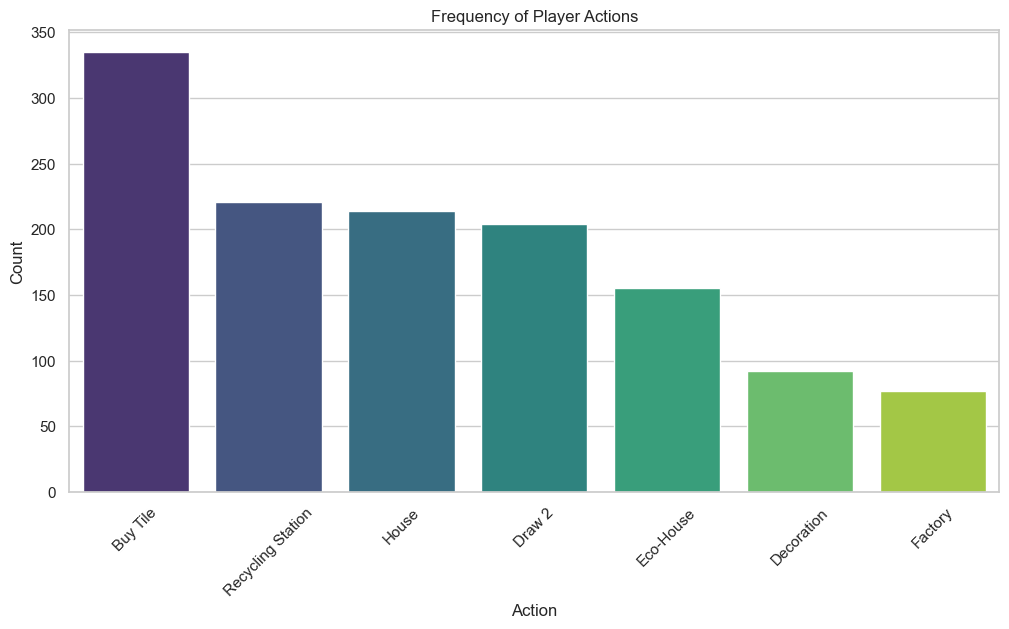

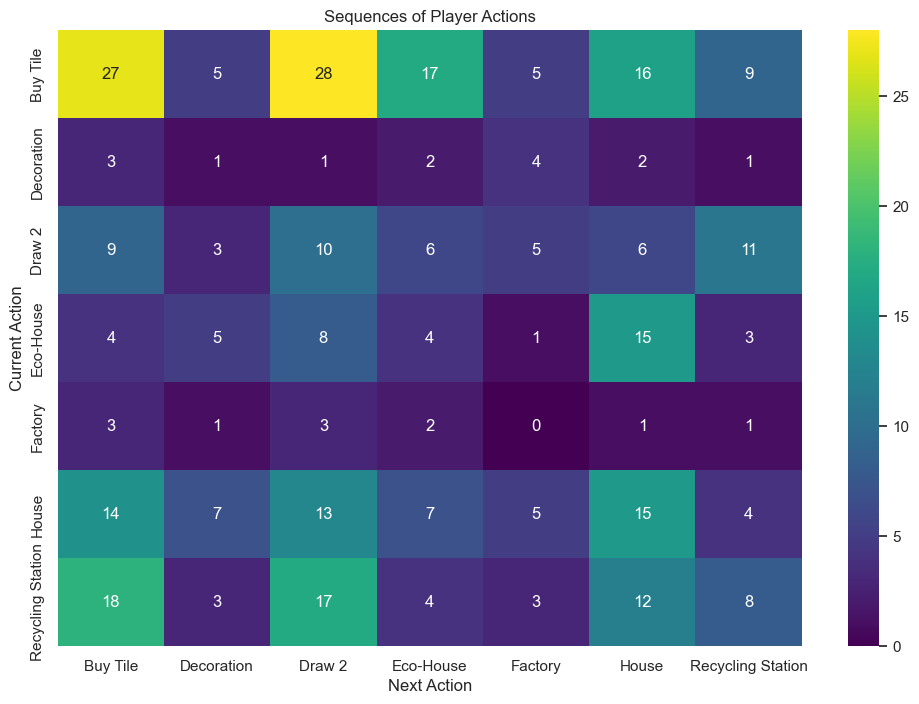

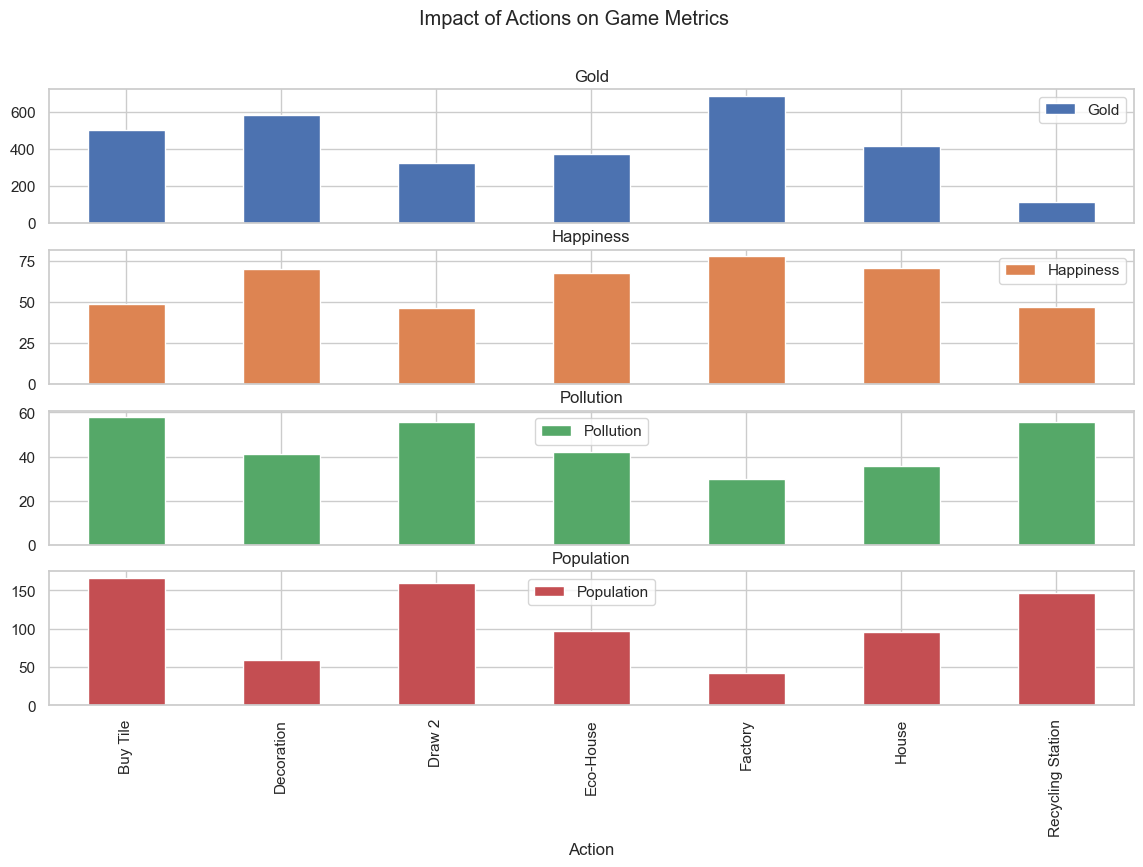

In [93]:
# Aggregate the frequency of each action
action_counts = aggregated_logs['Action'].value_counts()

# Plot the frequency of each action
plt.figure(figsize=(12, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')
plt.title('Frequency of Player Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze sequences of actions
aggregated_logs['NextAction'] = aggregated_logs.groupby('PlayerID')['Action'].shift(-1)
action_sequences = aggregated_logs.groupby(['Action', 'NextAction']).size().unstack().fillna(0)

# Plot the action sequences as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(action_sequences, annot=True, fmt='g', cmap='viridis')
plt.title('Sequences of Player Actions')
plt.xlabel('Next Action')
plt.ylabel('Current Action')
plt.show()

# Correlation of actions with metrics
action_metrics = aggregated_logs.groupby('Action')[['Gold', 'Happiness', 'Pollution', 'Population']].mean()

# Plot the impact of actions on metrics
action_metrics.plot(kind='bar', figsize=(14, 8), subplots=True, layout=(4, 1), sharex=True)
plt.suptitle('Impact of Actions on Game Metrics')
plt.xlabel('Action')
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\635322264.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  aggregated_logs['RoundedTimestamp'] = aggregated_logs['Timestamp'].dt.round('10T')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\635322264.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_impact.index, y=action_impact['Pollution_Change'], ax=ax[0], palette='viridis')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\635322264.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_impact.index, y=action_impact['Happiness_Change'], ax=ax[1], palette='viridis')


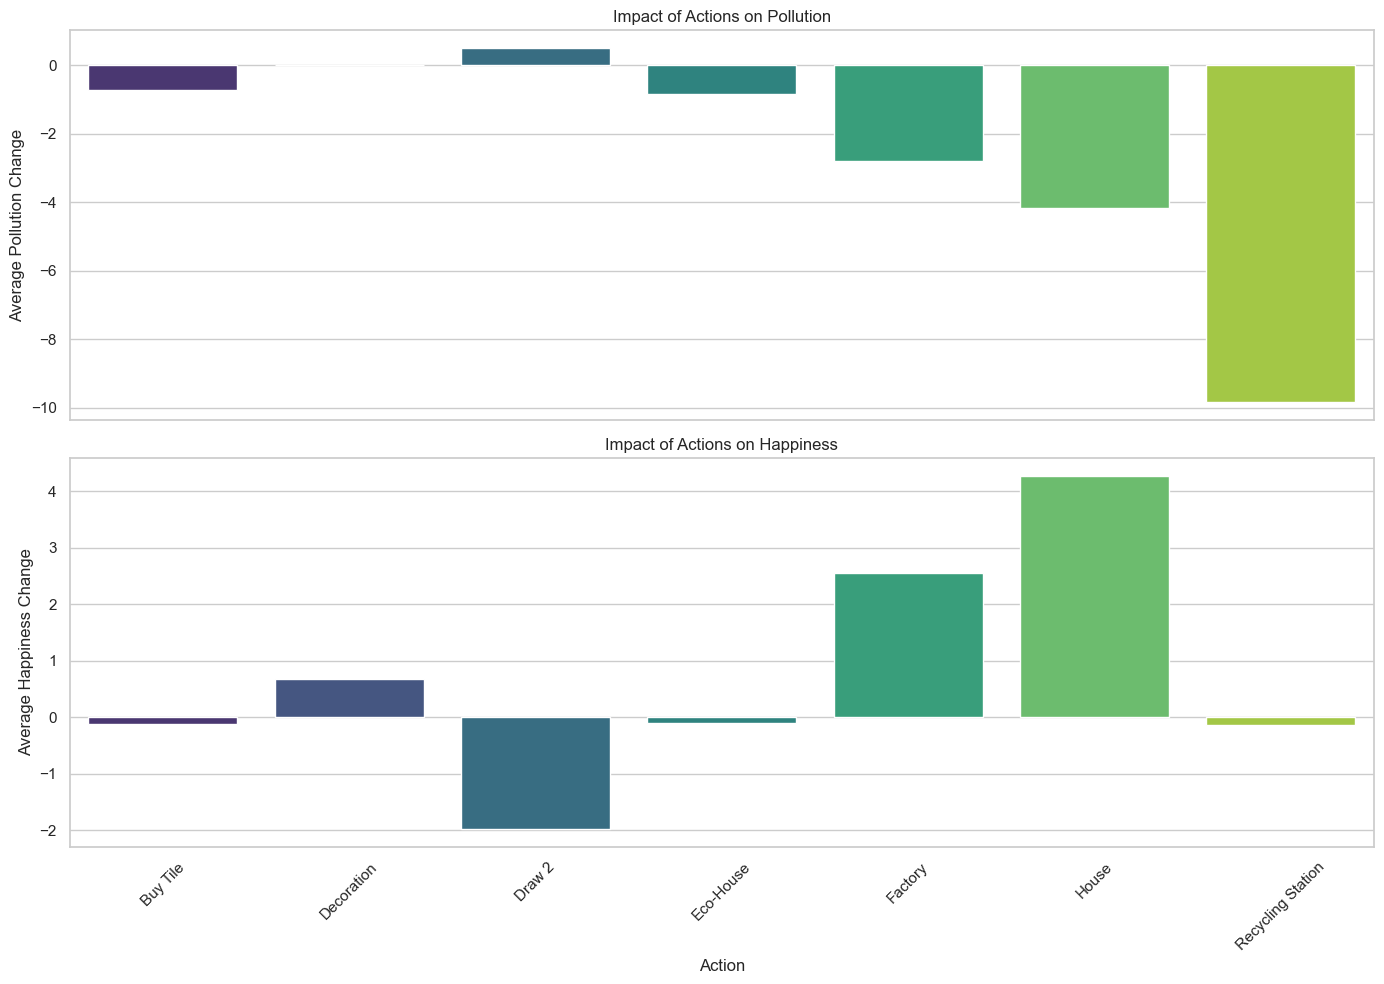

In [103]:
# Round the Timestamp to the nearest 10 minutes
aggregated_logs['RoundedTimestamp'] = aggregated_logs['Timestamp'].dt.round('10T')

# Sort the data by PlayerID and RoundedTimestamp
aggregated_logs.sort_values(by=['PlayerID', 'RoundedTimestamp'], inplace=True)

# Forward fill the Pollution and Happiness values to align them with the nearest update interval
aggregated_logs['Pollution_Filled'] = aggregated_logs.groupby('PlayerID')['Pollution'].ffill()
aggregated_logs['Happiness_Filled'] = aggregated_logs.groupby('PlayerID')['Happiness'].ffill()

# Calculate the changes in Pollution and Happiness
aggregated_logs['Pollution_Change'] = aggregated_logs.groupby('PlayerID')['Pollution_Filled'].diff().fillna(0)
aggregated_logs['Happiness_Change'] = aggregated_logs.groupby('PlayerID')['Happiness_Filled'].diff().fillna(0)

# Filter out rows where Action is NaN
action_data = aggregated_logs.dropna(subset=['Action'])

# Aggregate the average changes in Pollution and Happiness by action
action_impact = action_data.groupby('Action')[['Pollution_Change', 'Happiness_Change']].mean()

# Plot the impact of actions on Pollution and Happiness
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

sns.barplot(x=action_impact.index, y=action_impact['Pollution_Change'], ax=ax[0], palette='viridis')
ax[0].set_title('Impact of Actions on Pollution')
ax[0].set_ylabel('Average Pollution Change')

sns.barplot(x=action_impact.index, y=action_impact['Happiness_Change'], ax=ax[1], palette='viridis')
ax[1].set_title('Impact of Actions on Happiness')
ax[1].set_ylabel('Average Happiness Change')

plt.xticks(rotation=45)
plt.xlabel('Action')
plt.tight_layout()
plt.show()


                Gold  Happiness  Pollution  Population
Gold        1.000000   0.243245  -0.307934   -0.062208
Happiness   0.243245   1.000000  -0.537037   -0.601536
Pollution  -0.307934  -0.537037   1.000000    0.555735
Population -0.062208  -0.601536   0.555735    1.000000


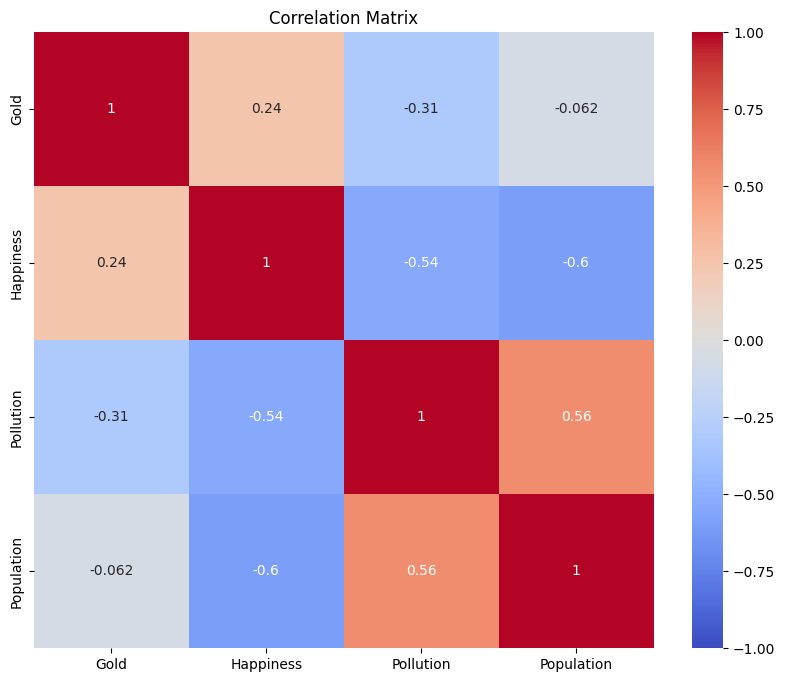

In [151]:
# Calculate correlation matrix
correlation_matrix = aggregated_logs[['Gold', 'Happiness', 'Pollution', 'Population']].corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


---------------------------------

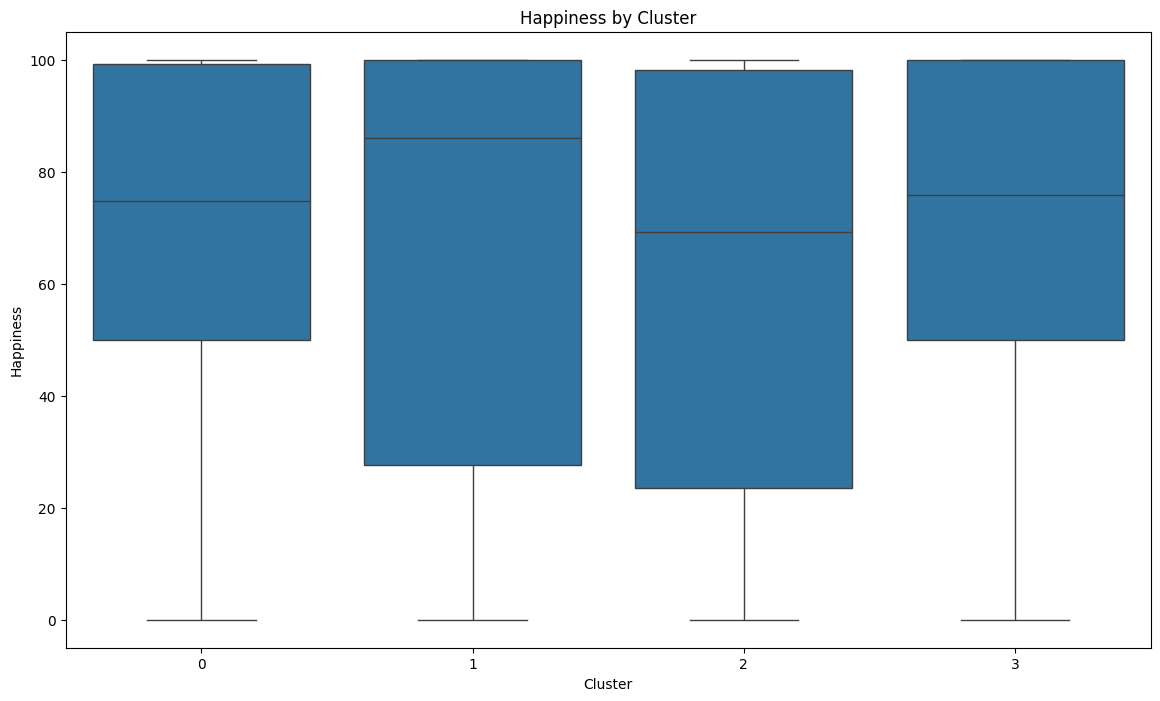

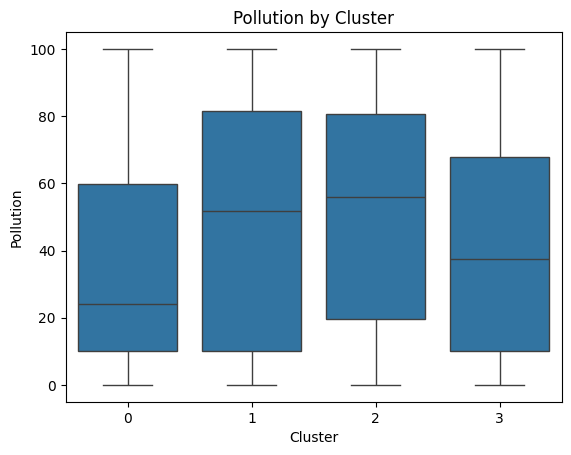

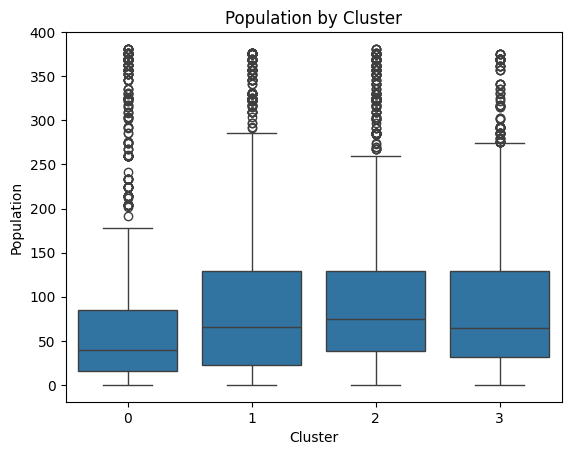

In [20]:
# Prepare data for clustering
strategy_features = ['Eco-House', 'Factory', 'Decoration', 'House']
X = aggregated_logs[strategy_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
aggregated_logs['Cluster'] = kmeans.fit_predict(X_scaled)

# Compare game outcomes by cluster
plt.figure(figsize=(14, 8))
for metric in metrics:
    sns.boxplot(x='Cluster', y=metric, data=aggregated_logs)
    plt.title(f'{metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.show()

   Eco-House   Factory  Decoration     House
0  -0.546282 -0.691157   -0.630622 -0.239841
1   0.060233  1.419455    0.896639  0.715808
2   1.811826 -0.390560   -0.081430  0.182751
3  -0.528870 -0.691157    1.559161  0.068330
4  -0.194358  1.414196   -0.630622 -0.308950


C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\2298524529.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=metric, data=aggregated_logs, palette=colors)


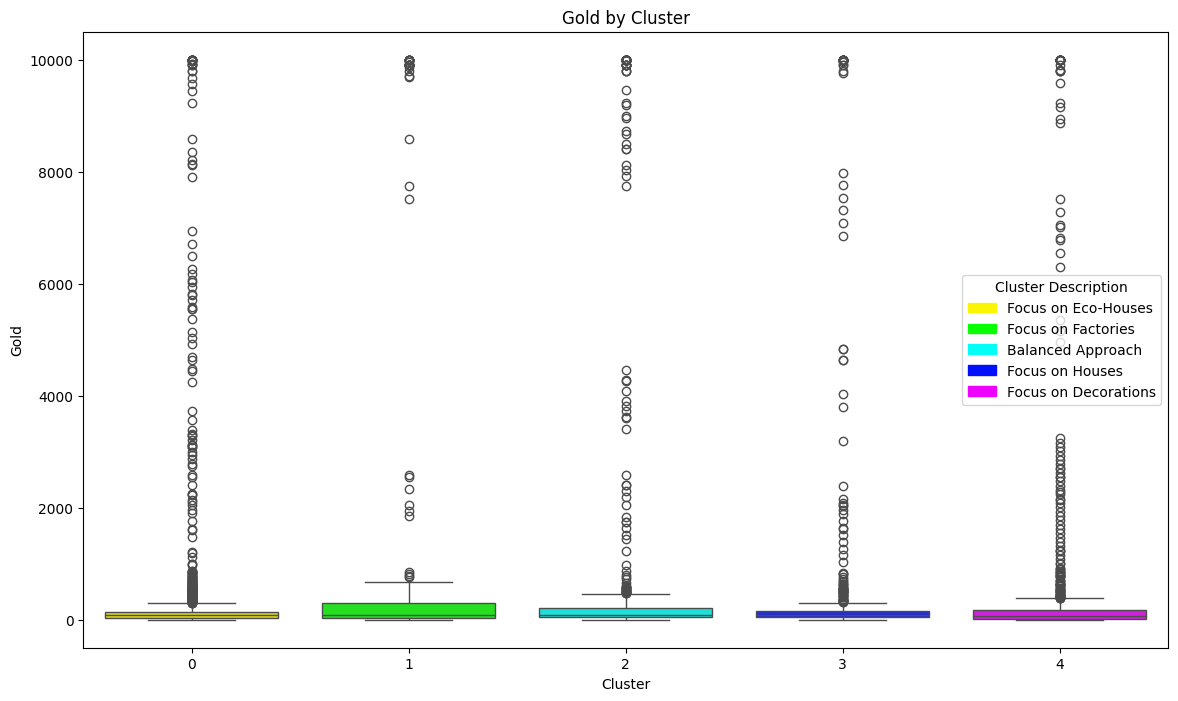

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\2298524529.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=metric, data=aggregated_logs, palette=colors)


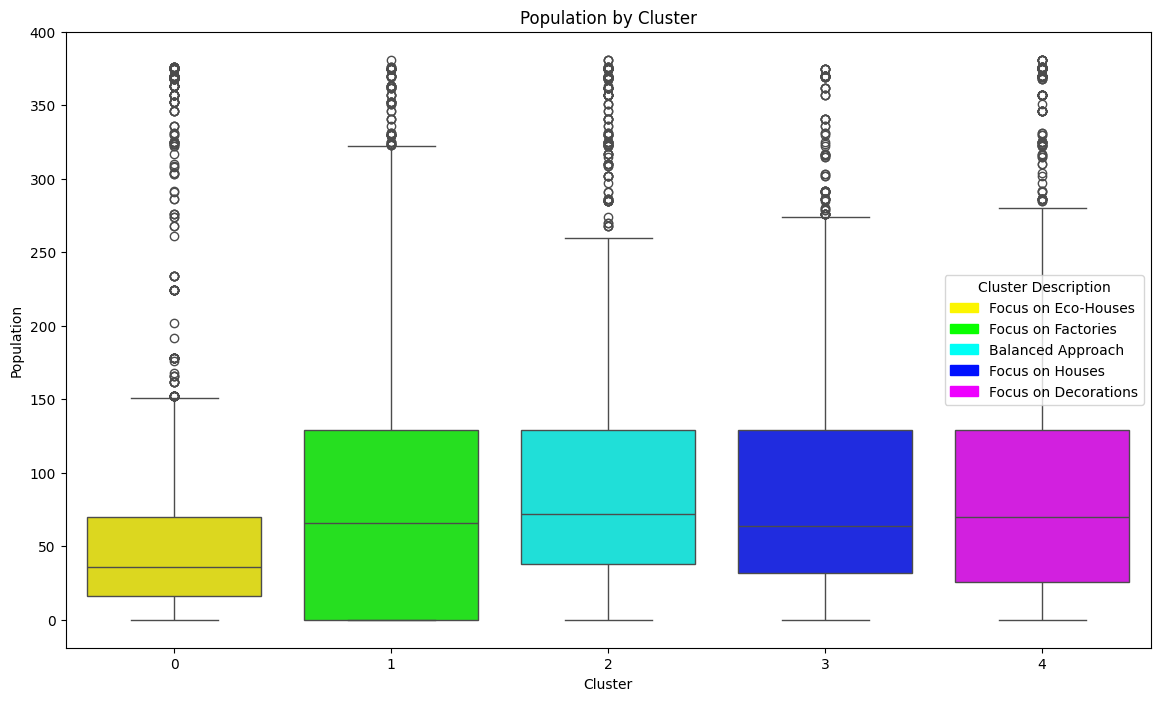

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\2298524529.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=metric, data=aggregated_logs, palette=colors)


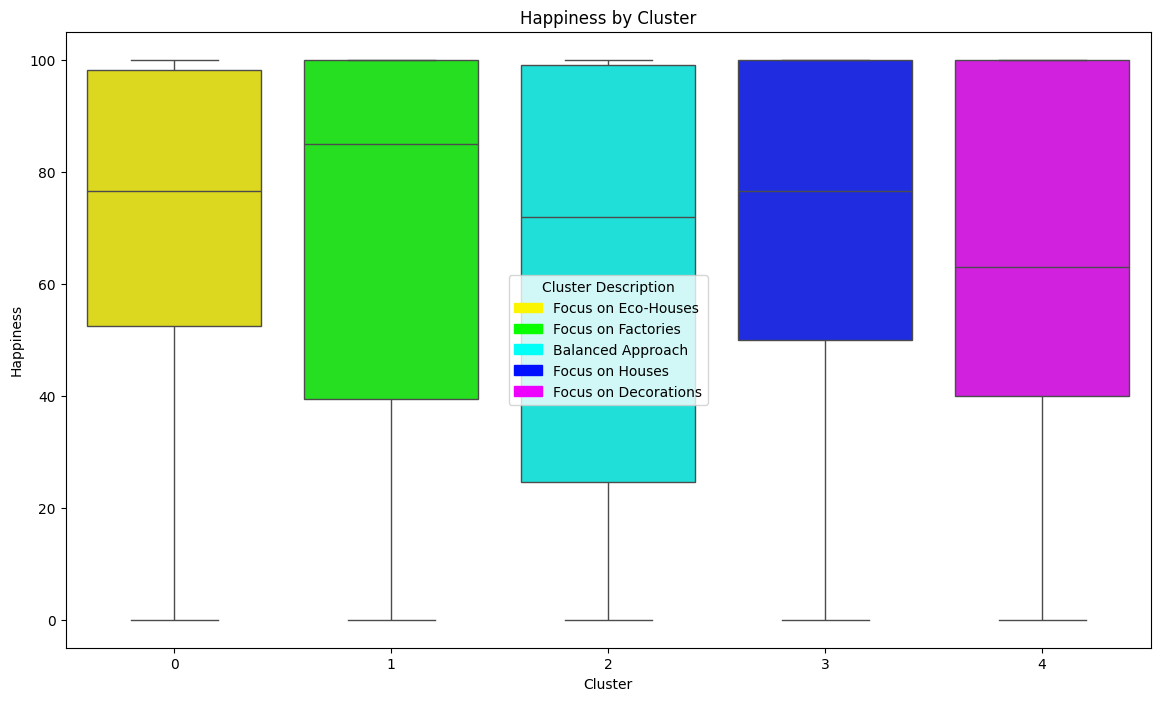

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14104\2298524529.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=metric, data=aggregated_logs, palette=colors)


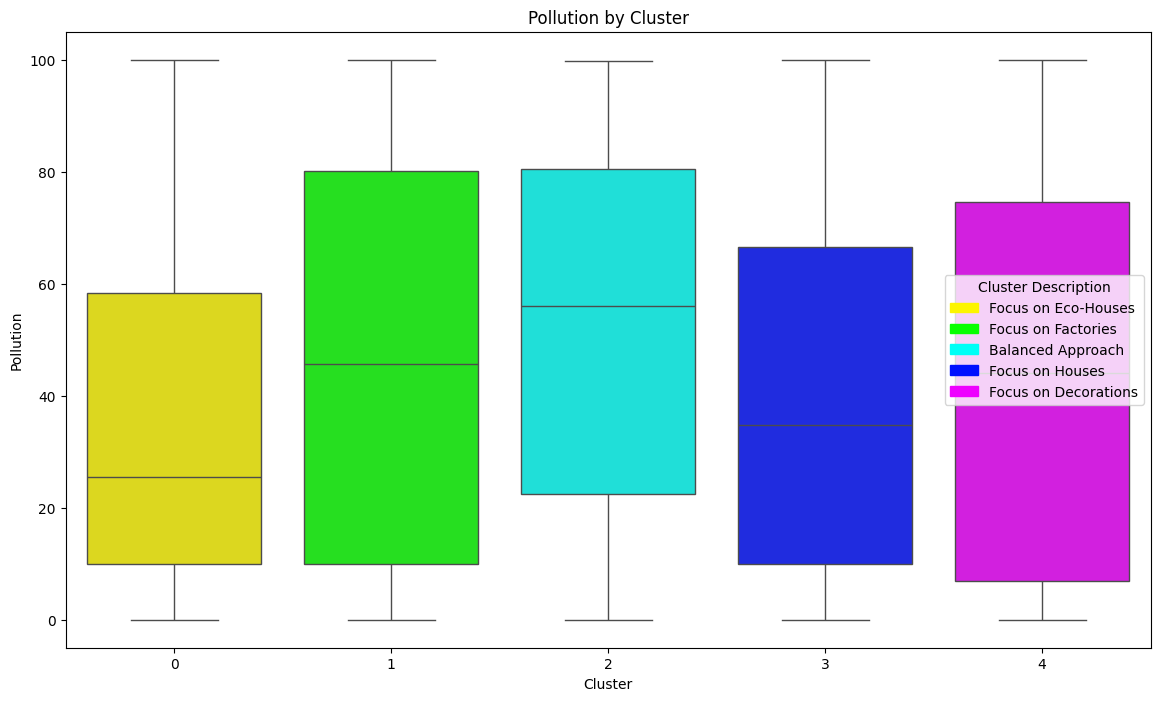

In [24]:
# Prepare data for clustering
strategy_features = ['Eco-House', 'Factory', 'Decoration', 'House']
X = aggregated_logs[strategy_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
aggregated_logs['Cluster'] = kmeans.fit_predict(X_scaled)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=strategy_features)
print(centroids_df)

# Define cluster descriptions based on centroids
cluster_descriptions = {
    0: "Focus on Eco-Houses",
    1: "Focus on Factories",
    2: "Balanced Approach",
    3: "Focus on Houses",
    4: "Focus on Decorations"
}

# Define colors for each cluster
colors = sns.color_palette("hsv", len(cluster_descriptions))

# Compare game outcomes by cluster with legends
metrics = ['Gold', 'Population', 'Happiness', 'Pollution']
for metric in metrics:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Cluster', y=metric, data=aggregated_logs, palette=colors)
    plt.title(f'{metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric)

    # Create legend patches
    legend_patches = [mpatches.Patch(color=colors[i], label=cluster_descriptions[i]) for i in cluster_descriptions]
    plt.legend(handles=legend_patches, title="Cluster Description")
    
    plt.show()